# Import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

# Util

In [4]:
states = ["TP", "TRP", "DP","ADP", "RMP", "HA", "VA", "PR", "BA", "BAP", "RS", "IM", "MA", "RA", "BAC", "RAP", "AA", "RAC"]

In [5]:
def importOccurencesData(path):
    with open(path, 'r') as fp:
        data = json.load(fp)
        data["14"] = 0
        return data

In [6]:
def importTransitionData(path):
    with open(path, 'r') as fp:
        data = json.load(fp)
        return data["data"]

# Occurences

In [7]:
path = Path("./dataset/occurences.json")
raw_data = importOccurencesData(path)
data = {}
for k,v in raw_data.items():
    data[states[int(k)]] = v
data = sorted(data.items(), key=lambda x:x[1], reverse = True)
data = dict(data)

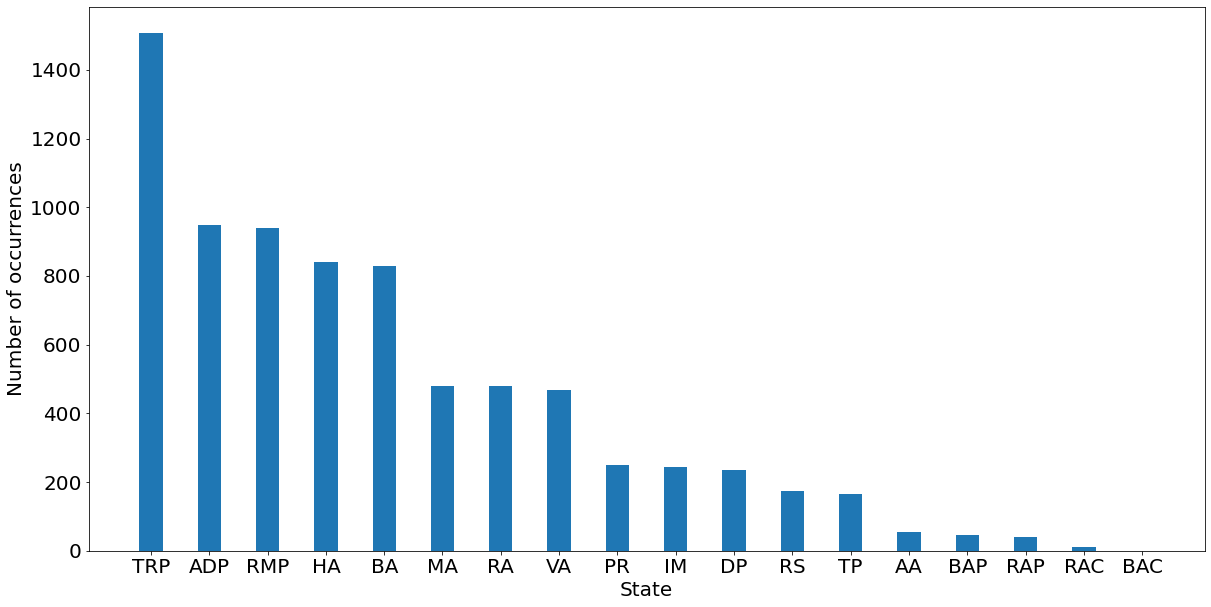

In [8]:
state = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20, 10))
plt.rc('font', size=20) #controls default text size
 
# creating the bar plot
plt.bar(state, values,
        width = 0.4)
 
plt.xlabel("State")
plt.ylabel("Number of occurrences")
plt.show()

# Transition

In [23]:
path = Path("./dataset/transition.json")
data =importTransitionData(path)
data = np.array(data)

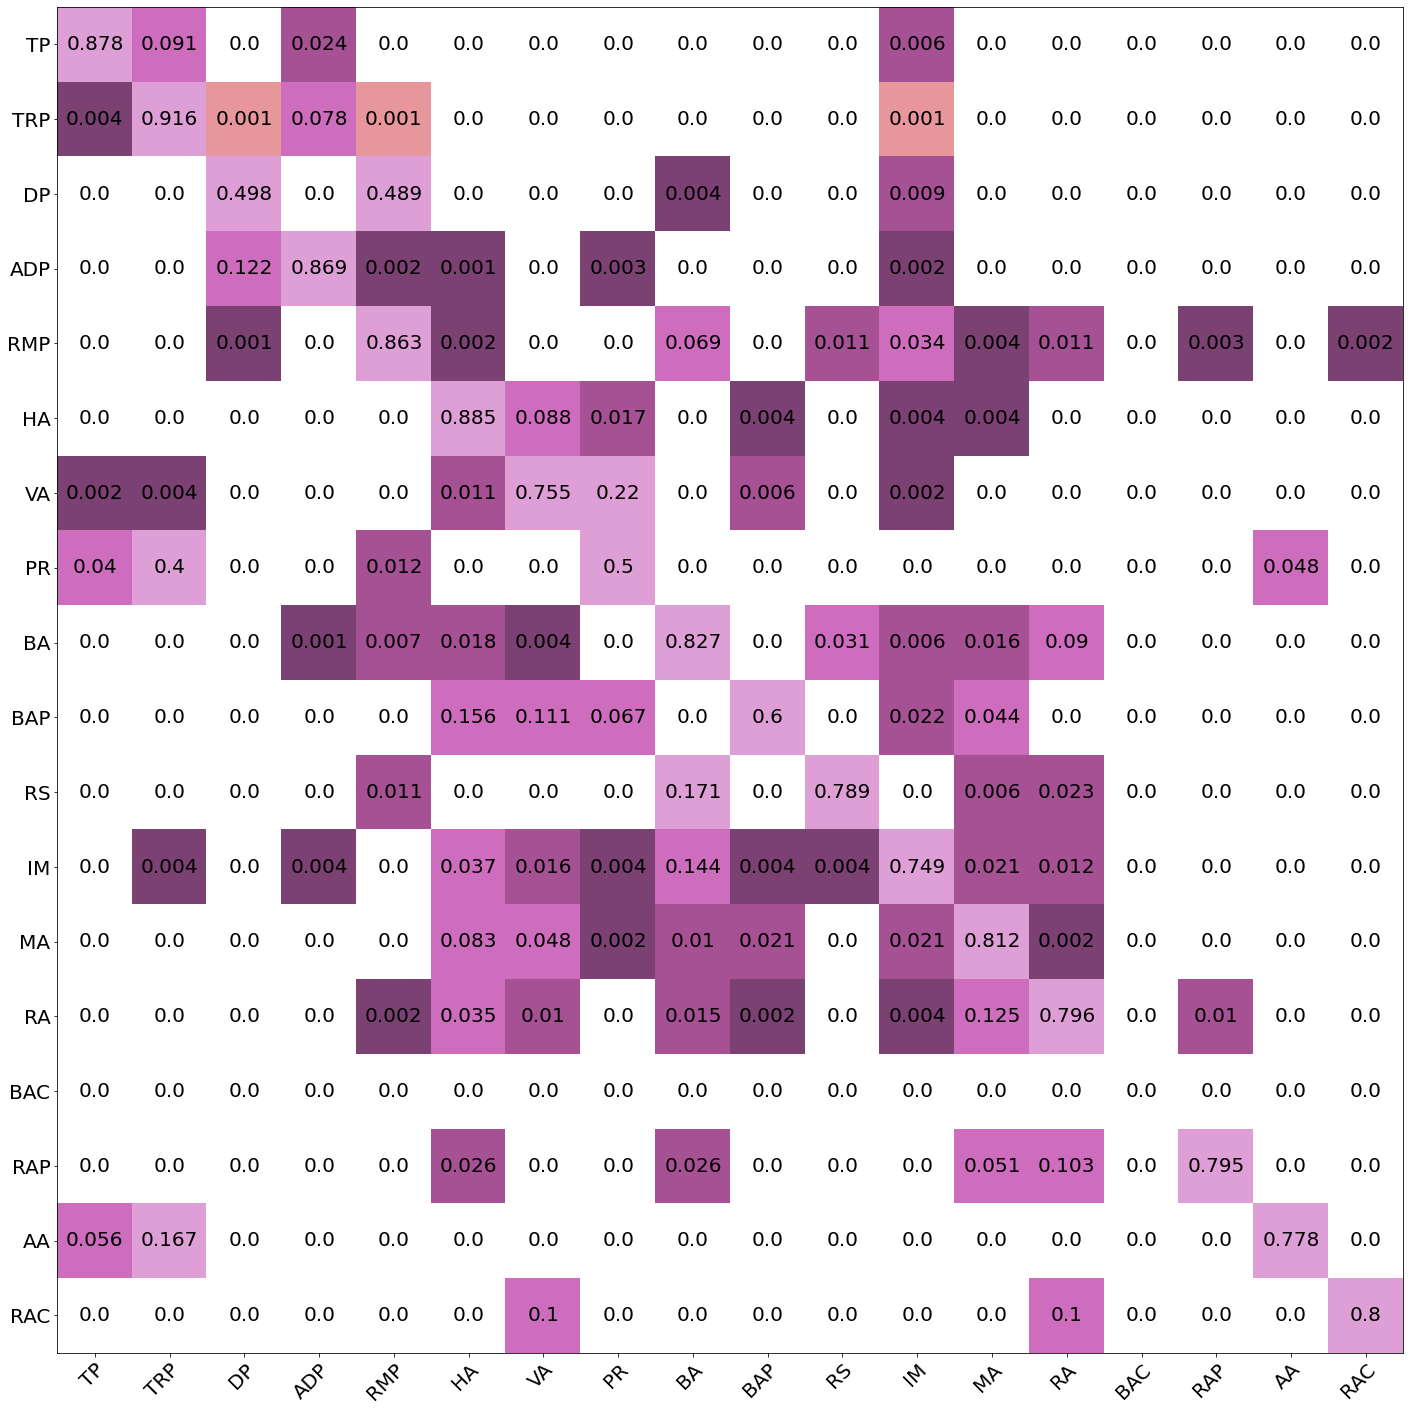

In [25]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.rc('font', size=20) #controls default text size

im = ax.imshow(data,norm=colors.LogNorm(0,1), cmap='tab20b')

# We want to show all ticks...
ax.set_xticks(np.arange(len(states)))
ax.set_yticks(np.arange(len(states)))
# ... and label them with the respective list entries
ax.set_xticklabels(states)
ax.set_yticklabels(states)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(states)):
    for j in range(len(states)):
        text = ax.text(j, i,round(data[i, j],3),
                       ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

# Transition ignore same

In [11]:
path = Path("./dataset/transition_ignore_same.json")
data =importTransitionData(path)
data = np.array(data)

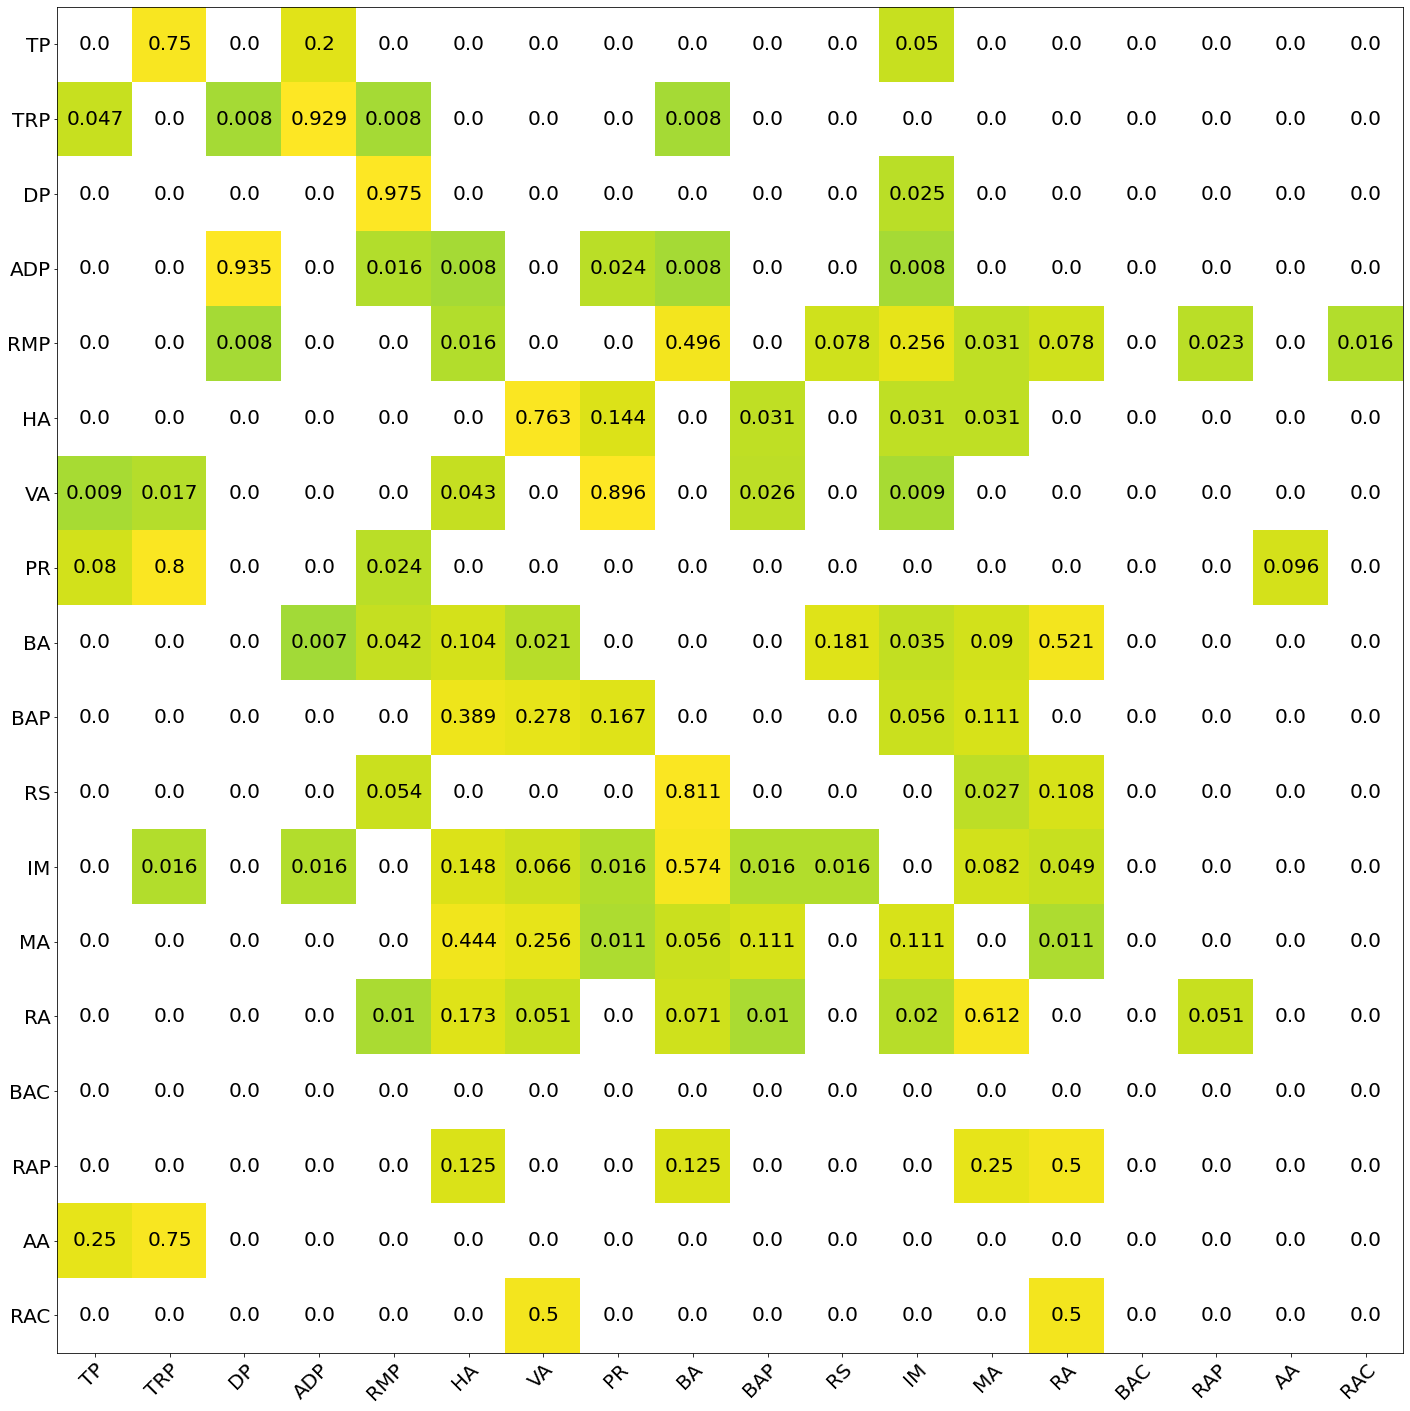

In [13]:
fig, ax = plt.subplots(figsize = (30, 20))
plt.rc('font', size=20) #controls default text size
im = ax.imshow(data, norm=colors.LogNorm(0,1))

# We want to show all ticks...
ax.set_xticks(np.arange(len(states)))
ax.set_yticks(np.arange(len(states)))
# ... and label them with the respective list entries
ax.set_xticklabels(states)
ax.set_yticklabels(states)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(states)):
    for j in range(len(states)):
        text = ax.text(j, i,round(data[i, j],3),
                       ha="center", va="center", color="black")

fig.tight_layout()
plt.show()